In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.integrate import solve_ivp
import seaborn as sns
from scipy.stats import special_ortho_group as sog
plt.rcParams['figure.figsize'] = (8, 8)

In [2]:
def SIR_model(t, state):
    I = state[0]
    R = state[1]
    beta = state[2]
    N = state[3]
    gamma = state[4]
    del_I = beta*(N-I-R)*I -I/gamma
    del_R = I/gamma 
    return (del_I, del_R, 0, 0, 0)

class Generate_SIR_Neff:

    def __init__(self, inf_data, param):
        self.I = inf_data
        self.initialval = param
    
    def obj_func(self, params):
        N = params[0]
        beta = params[1]
        gamma = params[2]
        t = len(self.I)
        SIR = solve_ivp(SIR_model, (0, t), y0=[self.I[0], 0, beta, N, gamma], t_eval=range(t))
        return SIR.y[0]-self.I

    def generate_parameters(self):
        N_ = self.initialval[0]
        beta_ = self.initialval[1]
        gamma_ = self.initialval[2]
        optim_params = least_squares(self.obj_func, (N_, beta_, gamma_))
        return optim_params


In [3]:
class Generate_SIR_Neff_fixed_dur:

    def __init__(self, inf_data, param, duration):
        self.I = inf_data
        self.dur = duration
        self.initialval = param
    
    def obj_func(self, params):
        N = params[0]
        beta = params[1]
        gamma = self.dur
        t = len(self.I)
        SIR = solve_ivp(SIR_model, (0, 2*t), y0=[self.I[0], 0, beta, N, gamma], t_eval=range(t))
        return SIR.y[0]-self.I

    def generate_parameters(self):
        N_ = self.initialval[0]
        beta_ = self.initialval[1]
        optim_params = least_squares(self.obj_func, (N_, beta_))
        return optim_params


In [4]:
class Generate_SIR:

    def __init__(self, inf_data, param, N):
        self.I = inf_data
        self.initialval = param
        self.N = N
    
    def obj_func(self, params):
        beta = params[0]
        gamma = params[1]
        t = len(self.I)
        SIR = solve_ivp(SIR_model, (0, t), y0=[self.I[0], 0, beta, self.N, gamma], t_eval=range(t))
        return SIR.y[0]-self.I

    def generate_parameters(self):
        beta_ = self.initialval[0]
        gamma_ = self.initialval[1]
        optim_params = least_squares(self.obj_func, (beta_, gamma_))
        return optim_params

# Age based Infection Model

In [40]:
random_gen = np.random.default_rng(seed=5)
beta_ = np.round(random_gen.uniform(size=(4, 4)), 2)
print(beta_)

[[0.81 0.81 0.52 0.29]
 [0.05 0.38 0.41 0.05]
 [0.05 1.   0.65 0.23]
 [0.43 0.97 0.9  0.84]]


In [3]:
#beta_[ij]: transmission rate from group i to group j
beta_ = np.array([[0.4, 0.02, 0.0, 0.0], [0.02, 1, 0, 0.], [0.0, 0.0, 0, 0.0], [0.0, 0.0, 0.0, 0.00]])
N_ratio = np.array([0.15, 0.35, 0.35, 0.15])
duration_inf = np.array([8, 6, 4, 12])
n = 100000
initial_infects = np.array([1, 1, 0, 0])
initial_suspects = N_ratio*n - initial_infects
initial_state = np.concatenate((initial_suspects, initial_infects))
print(beta_)

[[0.4  0.02 0.   0.  ]
 [0.02 1.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]]


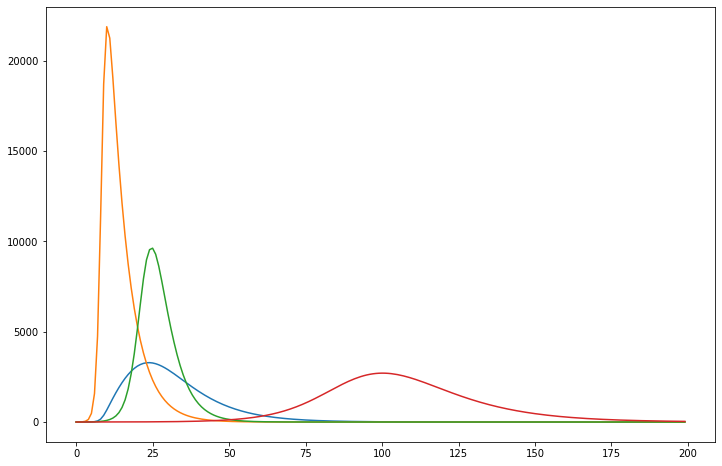

In [24]:
beta_ = np.array([[0.4, 0.02, 0.0, 0.0], [0.02, 1, 0, 0.], [0.0, 0.0, 0.5, 0.0], [0.0, 0.0, 0.0, 0.3]])
N_ratio = np.array([0.15, 0.35, 0.35, 0.15])
duration_inf = np.array([8, 6, 4, 12])
n = 100000
N = n*N_ratio
beta_ = (4*beta_)/n
initial_infects = np.array([1, 1, 1, 1])
initial_state = np.concatenate((initial_infects, [0, 0, 0, 0]))
days = 200
def age_SIR(t, state):
    I = np.array(state[:4])
    R = np.array(state[4:])
    dI = np.matmul((beta_.transpose()), I)*(N-I-R) - I/duration_inf
    dR = I/duration_inf
    del_ = np.concatenate((dI, dR))
    return del_
age_sol = solve_ivp(age_SIR, (0, 200), y0=initial_state, t_eval=range(days))
plt.plot(age_sol.y[0], label='age group 1')
plt.plot(age_sol.y[1], label='age group 2')
plt.plot(age_sol.y[2], label='age group 3')
plt.plot(age_sol.y[3], label='age group 4')
plt.show()

In [4]:
beta = '0.4 0.1\n 0.1 0.4'
beta = beta.split('\n')
beta_ = []
for vec_ in beta:
    trans_vector = [float(i) for i in vec_.split()]
    beta_.append(trans_vector)
beta_

[[0.4, 0.1], [0.1, 0.4]]

In [7]:
generator = np.random.default_rng(seed=1)
random_beta = np.round(generator.uniform(size=(4,4)), 2)
beta_list1 = np.array([[[0.2, 0, 0, 0], [0, 0.8, 0, 0], [0, 0, 0.5, 0], [0, 0, 0, 0.4]],
                       [[0.2, 0.1, 0, 0.15], [0.1, 0.8, 0.1, 0], [0, 0.1, 0.5, 0], [0.15, 0, 0, 0.4]],
                       [[0.2, 0.1, 0.05, 0.4], [0.22, 0.8, 0.3, 0.31], [0.4, 0.2, 0.5, 0], [0.2, 0.15, 0, 0.4]], random_beta])
beta_list2 = np.array([[[0.4, 0], [0, 0.8]], [[0.4, 0.1], [0.1, 0.8]], [[0.8, 0.1], [0.1, 0.4]], [[0.8, 0], [0, 0.4]]])
                       

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 0 is different from 2)

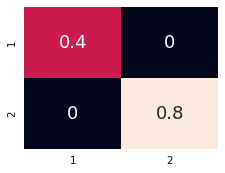

In [8]:
plt.rcParams['figure.figsize'] = (16, 12)
fig = plt.figure()
#fig, axs = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=True)
for i in range(4):
    axs1 = fig.add_subplot(4, 4, 4*i+1)
    if(i==0):
        sns.heatmap(beta_list2[i], annot=True, cbar=False, ax=axs1, xticklabels=[1, 2], yticklabels=[1, 2],  annot_kws={"fontsize":18})
    else:
        sns.heatmap(beta_list2[i], annot=True, cbar=False, ax=axs1, xticklabels=False, yticklabels=False,  annot_kws={"fontsize":18})
    axs1.tick_params(left=False, bottom=False)
    m = 2
    days = 100
    beta_ = beta_list2[i]
    N_ratio = np.array([0.5, 0.5])
    duration_inf = np.array([5, 10])
    n = 100000
    initial_infects = np.array([1, 1])
    initial_suspects = N_ratio*n - initial_infects
    initial_state = np.concatenate((initial_suspects, initial_infects))
    age_sol = solve_ivp(age_SIR, (0, 200), y0=initial_state, t_eval=range(days))
    total_infecteds = np.sum(age_sol.y[m:], axis=0)
    axs2 = fig.add_subplot(4, 4, 4*i+2)
    axs2.plot(age_sol.y[m], label='age group 1')
    axs2.plot(age_sol.y[m+1], label='age group 2')
    #axs2.plot(age_sol.y[m+2], label='age group 3')
    #axs2.plot(age_sol.y[m+3], label='age group 4')
    axs2.plot(total_infecteds, label='Total infected cases')
    #axs[0].fill_between(range(days), np.zeros(days), age_sol.y[m], label='Age group 1')
    #axs[0].fill_between(range(days), age_sol.y[m], age_sol.y[m+1]+age_sol.y[m], label='Age group 2')
    #plt.fill_between(range(60), age_sol.y[5]+age_sol.y[4], age_sol.y[5]+age_sol.y[4]+age_sol.y[6], label='Age group 3')
    #plt.fill_between(range(60), age_sol.y[5]+age_sol.y[4]+age_sol.y[6], age_sol.y[5]+age_sol.y[4]+age_sol.y[6]+age_sol.y[7], label='Age group 4')
    #axs2.set(ylabel='Infected Cases $I(t)$')       
    S = age_sol.y[0:m]
    I = age_sol.y[m:]
    emergent_cases = np.matmul((beta_.transpose()), I)*S/(N_ratio[0]*n)
    axs3 = fig.add_subplot(4, 4, 4*i+3, sharex=axs2)
    axs3.plot(emergent_cases[0], label='age group 1')
    axs3.plot(emergent_cases[1], label='age group 2')
    #axs3.plot(emergent_cases[2], label='age group 3')
    #axs3.plot(emergent_cases[3], label='age group 4')
    axs3.plot(np.sum(emergent_cases, axis=0), label='Total Incident Cases')
    #axs3.set(ylabel='Daily Incident Cases $E(t)$')
    if(i==3):
        axs2.set(xlabel='Days')
        axs3.set(xlabel='Days')
    if(i==0):
        axs1.set(title='Transmission Matrix')
        axs2.set(title='Infected Cases $I(t)$')
        axs2.legend()
        axs3.set(title='Daily Incident Cases $E(t)$')
        axs3.legend()
plt.show()

In [8]:
plt.rcParams['figure.figsize'] = (16, 14)
fig = plt.figure()
#fig, axs = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=True)
for i in range(3):
    m = 2
    days = 100
    beta_ = beta_list1[i]
    N_ratio = np.array([0.50, 0.50])
    duration_inf = np.array([5, 10])
    n = 100000
    initial_infects = np.array([1, 1])
    initial_suspects = N_ratio*n - initial_infects
    initial_state = np.concatenate((initial_suspects, initial_infects))
    age_sol = solve_ivp(age_SIR, (0, 200), y0=initial_state, t_eval=range(days))
    total_infecteds = np.sum(age_sol.y[m:], axis=0)
    obj_sir = Generate_SIR_Neff_fixed_dur(total_infecteds, [100000, 1.5], 8)
    params = obj_sir.generate_parameters().x
    gamma = 8
    t = 100
    SIR_sol2 = solve_ivp(SIR_model, (0, t), y0=[params[0]-total_infecteds[0], total_infecteds[0], params[1], params[0], gamma], t_eval=range(t))
    axs1 = fig.add_subplot(3, 3, 3*i+1)
    axs1.plot(total_infecteds, label='Ground Truth')
    axs1.plot(SIR_sol2.y[1], linestyle='dashed', label='Transformed SIR \n $N_e=$ %d' %params[0])    
    S = age_sol.y[0:m]
    I = age_sol.y[m:]
    emergent_cases = np.matmul((beta_.transpose()), I)*S/(N_ratio[0]*n)
    emergent_cases_fitted = params[1]*(SIR_sol2.y[0]*SIR_sol2.y[1])/params[0]
    axs2 = fig.add_subplot(3, 3, 3*i+2, sharex=axs1)
    axs2.plot(np.sum(emergent_cases, axis=0), label='Total Incident Cases')
    axs2.plot(emergent_cases_fitted, linestyle='dashed', label='Transformed SIR')
    error_map, beta_choice, dur_choice = error_heatmap(total_infecteds, params, gamma)
    axs3 = fig.add_subplot(3, 3, 3*i+3)
    axs3 = sns.heatmap(error_map, yticklabels=np.round(beta_choice, 2), xticklabels=np.round(dur_choice, 1), cmap='terrain')
    axs3.scatter(2.5, 2.5, marker='x', s=400, color='black')
    axs1.legend()
    if(i==3):
        axs1.set(xlabel='Days')
        axs2.set(xlabel='Days')
    if(i==0):
        axs1.set(title='Infected Cases $I(t)$')
        
        axs2.set(title='Daily Incident Cases $E(t)$')
        axs2.legend()
        axs3.set(title='Error Heatmap')
        axs3.set( xlabel='Duration', ylabel='Tranmission rate')
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 4)

<Figure size 1152x1008 with 0 Axes>

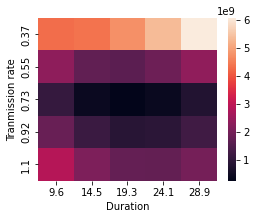

In [35]:
plt.rcParams['figure.figsize'] = (4, 3)
m = 2
days = 100
beta_ = beta_list[0]
N_ratio = np.array([0.50, 0.50])
duration_inf = np.array([5, 10])
n = 100000
initial_infects = np.array([1, 1])
initial_suspects = N_ratio*n - initial_infects
initial_state = np.concatenate((initial_suspects, initial_infects))
age_sol = solve_ivp(age_SIR, (0, 200), y0=initial_state, t_eval=range(days))
total_infecteds = np.sum(age_sol.y[m:], axis=0)
obj_sir = Generate_SIR_Neff(total_infecteds, [100000, 1.5, 8])
params = obj_sir.generate_parameters().x
error_map, beta_choice, dur_choice = error_heatmap(total_infecteds, params)
fig = plt.figure()
fig = sns.heatmap(error_map, yticklabels=np.round(beta_choice, 2), xticklabels=np.round(dur_choice, 1))
fig.set( xlabel='Duration', ylabel='Tranmission rate')
plt.show()

In [20]:
print(obj_sir.generate_parameters().cost)
error_heatmap(total_infecteds, params)/2

6312231.144693409


array([[8.92663719e+09, 8.82345451e+09, 9.23059375e+09, 1.00394878e+10,
        1.11516219e+10],
       [4.12297534e+09, 2.90984409e+09, 2.57116952e+09, 2.80510288e+09,
        3.44493490e+09],
       [1.18927047e+09, 2.58624936e+08, 6.31223114e+06, 2.11970988e+08,
        7.65970533e+08],
       [2.19528350e+09, 1.69126013e+09, 1.53831811e+09, 1.71071800e+09,
        2.17619629e+09],
       [4.75654756e+09, 4.34014177e+09, 4.13457736e+09, 4.20680456e+09,
        4.55655743e+09]])

# Calculation of $R_0$ 

We want to compare instances with same $R_0$
## Sampling Strategies for $R_0$

In [28]:
transmission_matrix = np.array([[0.4, 0.1], [0.1, 0.8]])
duration_inf = np.array([[5, 5]])
duration_inf = np.repeat(duration_inf, 2, axis=0)
pop_ratios = np.array([[1], [1]])
pop_ratios = np.repeat(pop_ratios, 2, axis=1)
dynamics = np.transpose(transmission_matrix)*duration_inf*pop_ratios
reproduction_no = max(np.linalg.eig(dynamics)[0])
print(reproduction_no)
trace_ = np.trace(transmission_matrix)
det_ = np.linalg.det(transmission_matrix)

beta_list = []
for seed in [1, 10, 100]:
    random_gen = np.random.default_rng(seed)
    beta_11 = random_gen.uniform(0.4, 0.8)
    beta_22 = trace_-beta_11
    beta_12 = random_gen.uniform(0.1, 0.3)
    beta_21 = (beta_11*beta_22 - det_)/beta_12
    matrix_ = np.array([[beta_11, beta_12], [beta_21, beta_22]])
    beta_list.append(matrix_)



4.118033988749895


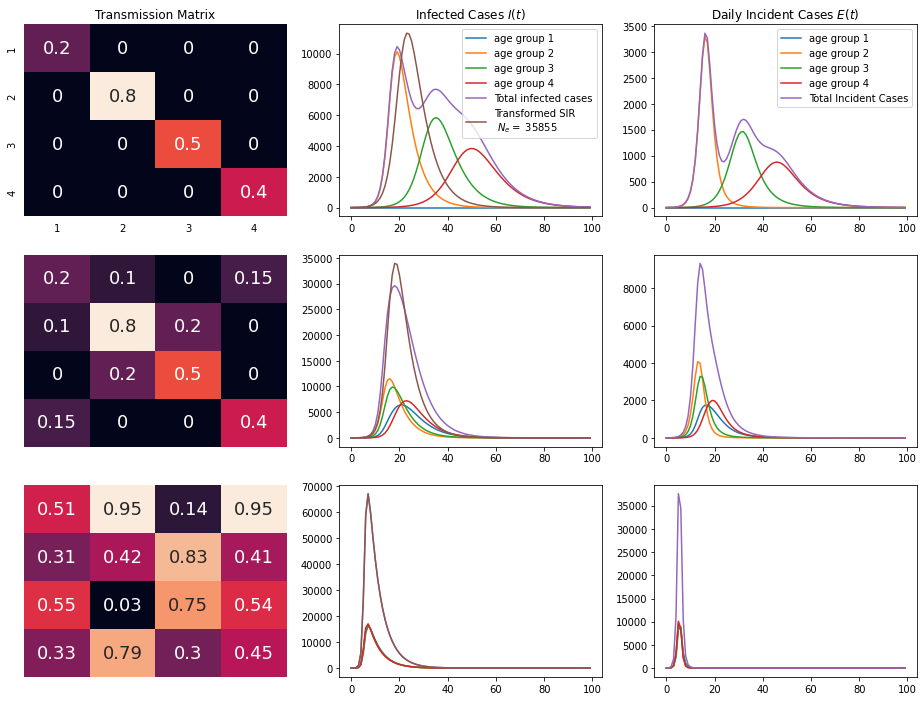

In [14]:
plt.rcParams['figure.figsize'] = (16, 12)
fig = plt.figure()
#fig, axs = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=True)
for i in range(3):
    axs1 = fig.add_subplot(3, 3, 3*i+1)
    if(i==0):
        sns.heatmap(beta_list1[i], annot=True, cbar=False, ax=axs1, xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4],  annot_kws={"fontsize":18})
    else:
        sns.heatmap(beta_list1[i], annot=True, cbar=False, ax=axs1, xticklabels=False, yticklabels=False,  annot_kws={"fontsize":18})
    axs1.tick_params(left=False, bottom=False)
    m = 4
    days = 100
    beta_ = beta_list1[i]
    N_ratio = np.array([0.25, 0.25, 0.25, 0.25])
    duration_inf = np.array([5, 5, 5, 5])
    n = 100000
    initial_infects = np.array([1, 1, 1, 1])
    initial_suspects = N_ratio*n - initial_infects
    initial_state = np.concatenate((initial_suspects, initial_infects))
    age_sol = solve_ivp(age_SIR, (0, 200), y0=initial_state, t_eval=range(days))
    total_infecteds = np.sum(age_sol.y[m:], axis=0)
    obj_sir = Generate_SIR_Neff_fixed_dur(total_infecteds, [100000, 1.2], 5)
    params = obj_sir.generate_parameters().x
    SIR_sol2 = solve_ivp(SIR_model, (0, days), y0=[params[0]-total_infecteds[0], total_infecteds[0], params[1], params[0], 5], t_eval=range(days))
    axs2 = fig.add_subplot(3, 3, 3*i+2)
    axs2.plot(age_sol.y[m], label='age group 1')
    axs2.plot(age_sol.y[m+1], label='age group 2')
    axs2.plot(age_sol.y[m+2], label='age group 3')
    axs2.plot(age_sol.y[m+3], label='age group 4')
    axs2.plot(total_infecteds, label='Total infected cases')
    axs2.plot(SIR_sol2.y[1],  label='Transformed SIR \n $N_e=$ %d' %params[0])
    #axs[0].fill_between(range(days), np.zeros(days), age_sol.y[m], label='Age group 1')
    #axs[0].fill_between(range(days), age_sol.y[m], age_sol.y[m+1]+age_sol.y[m], label='Age group 2')
    #plt.fill_between(range(60), age_sol.y[5]+age_sol.y[4], age_sol.y[5]+age_sol.y[4]+age_sol.y[6], label='Age group 3')
    #plt.fill_between(range(60), age_sol.y[5]+age_sol.y[4]+age_sol.y[6], age_sol.y[5]+age_sol.y[4]+age_sol.y[6]+age_sol.y[7], label='Age group 4')
    #axs2.set(ylabel='Infected Cases $I(t)$')       
    S = age_sol.y[0:m]
    I = age_sol.y[m:]
    emergent_cases = np.matmul((beta_.transpose()), I)*S/(N_ratio[0]*n)
    axs3 = fig.add_subplot(3, 3, 3*i+3, sharex=axs2)
    axs3.plot(emergent_cases[0], label='age group 1')
    axs3.plot(emergent_cases[1], label='age group 2')
    axs3.plot(emergent_cases[2], label='age group 3')
    axs3.plot(emergent_cases[3], label='age group 4')
    axs3.plot(np.sum(emergent_cases, axis=0), label='Total Incident Cases')
    #axs3.set(ylabel='Daily Incident Cases $E(t)$')
    if(i==3):
        axs2.set(xlabel='Days')
        axs3.set(xlabel='Days')
    if(i==0):
        axs1.set(title='Transmission Matrix')
        axs2.set(title='Infected Cases $I(t)$')
        axs2.legend()
        axs3.set(title='Daily Incident Cases $E(t)$')
        axs3.legend()
plt.show()

In [13]:
import matplotlib.pyplot as plt

In [7]:
beta_list1 = np.array([[[0.2, 0, 0, 0], [0, 0.8, 0, 0], [0, 0, 0.5, 0], [0, 0, 0, 0.4]],
                       [[0.2, 0.4, 0.05, 0.05], [0.1, 0.8, 0.05, 0.05], [0.05, 0.05, 0.5, 0.05], [0.05, 0.05, 0.05, 0.4]],
                       [[0.2, 0.1, 0.05, 0.05], [0.3, 0.8, 0.4, 0.05], [0.4, 0.2, 0.5, 0.05], [0.05, 0.05, 0.05, 0.4]], random_beta])

In [8]:
#heatmap of errors

def least_sq_error(ts1, ts2):
    return 0.5*np.sum((ts1-ts2)**2)

def error_heatmap(infected_data, params, dur):
    N_ = params[0]
    beta_ = params[1]
    duration_inf = dur
    poss_beta = np.array([0.7*beta_, 0.8*beta_, 0.9*beta_, beta_,  1.1*beta_, 1.2*beta_, 1.3*beta_])
    poss_duration = np.array([0.7*duration_inf, 0.8*duration_inf, 0.9*duration_inf, duration_inf, 1.1*duration_inf, 1.2*duration_inf, 1.3*duration_inf])
    heatmap_errors = np.zeros((len(poss_beta), len(poss_duration)))
    t = len(infected_data)
    for (i, dur) in enumerate(poss_duration):
        for (j, beta) in enumerate(poss_beta):
            SIR_sol = solve_ivp(SIR_model, (0, t), y0=[infected_data[0], 0, beta, N_, dur], t_eval=range(t))
            heatmap_errors[j][i] = least_sq_error(SIR_sol.y[0], infected_data)
    
    const_ = heatmap_errors[3][3]

    for i in range(len(heatmap_errors)):
        for j in range(len(heatmap_errors[0])):
            heatmap_errors[i][j] = heatmap_errors[i][j]/const_
    return heatmap_errors, poss_beta, poss_duration

[6.19411268e+02 8.51991776e-04]
9970.650647758637
[8.99611307e+02 7.69307962e-04]
4124.605421867281
[9.91144217e+02 1.08582284e-03]
73.66450556199516
[9.98784414e+02 2.03983640e-03]
4.04198984310897


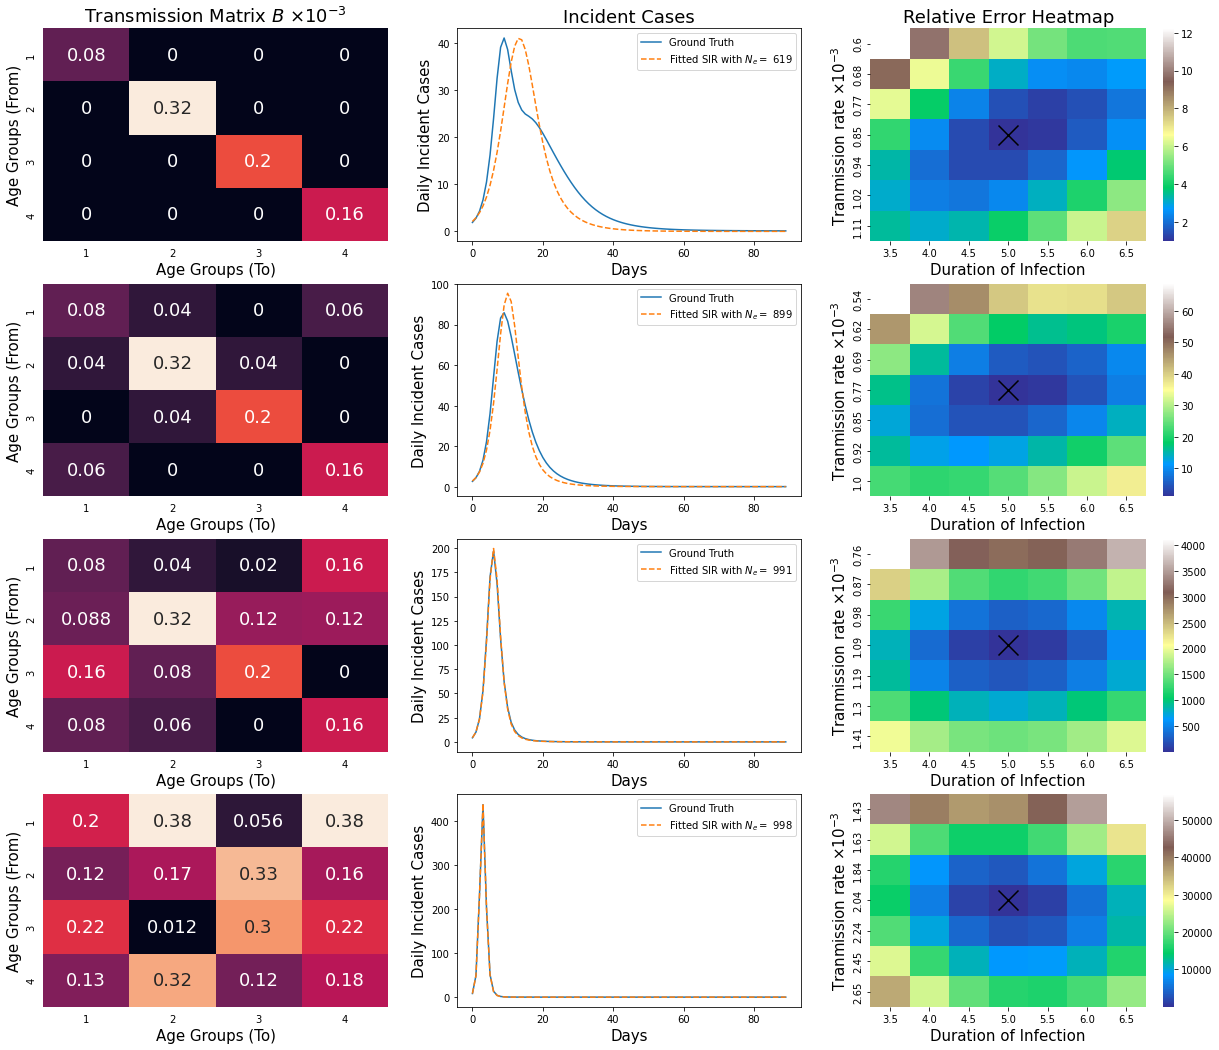

In [59]:
plt.rcParams['figure.figsize'] = (21, 18)
plt.rcParams.update({'font.size': 10})
fig = plt.figure()
#fig, axs = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=True)
for i in range(4):
    axs1 = fig.add_subplot(4, 3, 3*i+1)
    sns.heatmap(beta_list1[i]/2.5, annot=True, cbar=False, ax=axs1, xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4],  annot_kws={"fontsize":18})
    axs1.tick_params(left=False, bottom=False)
    axs1.set_xlabel('Age Groups (To)', fontsize=15)
    axs1.set_ylabel('Age Groups (From)', fontsize=15)
    m = 4
    days = 90
    N_ratio = np.array([0.25, 0.25, 0.25, 0.25])
    duration_inf = np.array([5, 5, 5, 5])
    n = 1000
    N = n*N_ratio
    beta_ = beta_list1[i]/250
    initial_infects = np.array([1, 1, 1, 1])
    initial_state = np.concatenate((initial_infects, [0, 0, 0, 0]))
    def age_SIR(t, state):
        I = np.array(state[:4])
        R = np.array(state[4:])
        dI = np.matmul((beta_.transpose()), I)*(N-I-R) - I/duration_inf
        dR = I/duration_inf
        del_ = np.concatenate((dI, dR))
        return del_
    age_sol = solve_ivp(age_SIR, (0, 200), y0=initial_state, t_eval=range(days))
    total_infecteds = np.sum(age_sol.y[:m], axis=0)
    obj_sir = Generate_SIR_Neff_fixed_dur(total_infecteds, [1200, 1.2e-3], 5)
    params = obj_sir.generate_parameters().x
    print(params)
    t = 90
    SIR_sol2 = solve_ivp(SIR_model, (0, t), y0=[total_infecteds[0], 0, params[1], params[0], 5], t_eval=range(t))
    #axs2 = fig.add_subplot(3, 4, 4*i+2)
    #axs2.plot(total_infecteds, label='Ground Truth')
    #axs2.plot(SIR_sol2.y[1], linestyle='dashed', label='Transformed SIR \n $N_e=$ %d' %params[0])    
    I = age_sol.y[:m]
    R = age_sol.y[m:]
    S = 250-I-R
    emergent_cases = np.matmul((beta_.transpose()), I)*S
    emergent_cases_fitted = params[1]*(SIR_sol2.y[0]*(params[0]-SIR_sol2.y[0]-SIR_sol2.y[1]))
    axs3 = fig.add_subplot(4, 3, 3*i+2)
    axs3.plot(np.sum(emergent_cases, axis=0), label='Ground Truth')
    axs3.plot(emergent_cases_fitted, linestyle='dashed', label='Fitted SIR with $N_e=$ %d' %params[0])
    error_map, beta_choice, dur_choice = error_heatmap(total_infecteds, params, 5)
    axs4 = fig.add_subplot(4, 3, 3*i+3)
    axs4 = sns.heatmap(error_map, yticklabels=np.round(beta_choice*(10**3), 2), xticklabels=np.round(dur_choice, 1), cmap='terrain')
    axs4.scatter(3.5, 3.5, marker='x', s=400, color='black')
    axs3.legend()
    axs3.set_xlabel('Days', fontsize=15)
    axs3.set_ylabel('Daily Incident Cases', fontsize=15)
    if(i==0):
        axs1.set_title('Transmission Matrix $B$ $\\times 10^{-3}$', fontsize=18)
        axs3.set_title('Incident Cases', fontsize=18)
        axs4.set_title('Relative Error Heatmap', fontsize=18)
    axs4.set_xlabel('Duration of Infection', fontsize=15)
    axs4.set_ylabel('Tranmission rate $\\times 10^{-3}$', fontsize=15)
    print(least_sq_error(total_infecteds, SIR_sol2.y[0]))
plt.show()

# Box Plot $R_0$

In [10]:
plt.rcParams['figure.figsize'] = (12, 8)

In [5]:
def least_sq_error(ts1, ts2):
    return 0.5*np.sum((ts1-ts2)**2)

def gen_reprod_no(transmission_matrix):
    n = len(transmission_matrix)
    duration_inf = np.array([[5 for i in range(n)]])
    duration_inf = np.repeat(duration_inf, n, axis=0)
    pop_ratios = np.array([[1] for i in range(n)])
    pop_ratios = np.repeat(pop_ratios, n, axis=1)
    dynamics = np.transpose(transmission_matrix)*duration_inf*pop_ratios
    reproduction_no = max(np.linalg.eig(dynamics)[0])
    return reproduction_no

def gen_coll_trans_matrices(transmission_matrix):
    n = len(transmission_matrix)
    seed = 0
    coll_matrices = []
    while(True):
        b = sog.rvs(n, random_state=seed)
        c = np.matmul(np.matmul(np.transpose(b), transmission_matrix), b)
        seed += 1
        if(np.all(c>=np.zeros((n, n)))):
            coll_matrices.append(c)
        if(len(coll_matrices)==1000):
            break
    
    return coll_matrices

def gen_transformed_R0(beta_list):
    m = len(beta_list[0])
    days = 90
    N_ratio = np.array([1/m for i in range(m)])
    duration_inf = np.array([5 for i in range(m)])
    n = 1000
    N = n*N_ratio
    initial_infects = np.array([1 for i in range(m)])
    initial_state = np.concatenate((initial_infects, [0 for i in range(m)]))
    transformed_r0 = []
    transformed_ne = []
    loss_values = []

    def age_SIR(t, state):
        I = np.array(state[:m])
        R = np.array(state[m:])
        dI = np.matmul((beta_.transpose()), I)*(n/m-I-R) - I/duration_inf
        dR = I/duration_inf
        del_ = np.concatenate((dI, dR))
        return del_
    
    for beta_ in beta_list:
        beta_ = (m*beta_)/n
        age_sol = solve_ivp(age_SIR, (0, 200), y0=initial_state, t_eval=range(days))
        total_infecteds = np.sum(age_sol.y[:m], axis=0)
        obj_sir = Generate_SIR_Neff_fixed_dur(total_infecteds, [800, 1.2e-3], 5)
        params = obj_sir.generate_parameters().x
        SIR_sol = solve_ivp(SIR_model, (0, 200), y0=[total_infecteds[0], 0, params[1], params[0], 5], t_eval=range(days))
        transformed_r0.append(params[1]*5*params[0])
        transformed_ne.append(params[0])
        loss_values.append(least_sq_error(SIR_sol.y[0], total_infecteds))
    
    return transformed_r0, transformed_ne, loss_values

In [6]:
trans_mat2 = np.array([[0.3, 0], [0, 0.8]])
trans_mat3 = np.array([[0.3, 0, 0], [0, 0.4, 0], [0, 0, 0.8]])
trans_mat4 = np.array([[0.2, 0, 0, 0], [0, 0.8, 0, 0], [0, 0, 0.5, 0], [0, 0, 0, 0.4]])
poss2 = gen_coll_trans_matrices(trans_mat2)
poss3 = gen_coll_trans_matrices(trans_mat3)
poss4 = gen_coll_trans_matrices(trans_mat4)

In [7]:
transformed_R0_2, Ne_2, loss_2 = gen_transformed_R0(poss2)
transformed_R0_3, Ne_3, loss_3 = gen_transformed_R0(poss3)
transformed_R0_4, Ne_4, loss_4 = gen_transformed_R0(poss4)

In [13]:
df = pd.DataFrame((transformed_R0_3, Ne_3, loss_3, transformed_R0_4, Ne_4, loss_4))
df.to_csv('Point_1.csv')

In [9]:
df = pd.read_csv('Point_1.csv')

In [15]:
transformed_R0_3 = df.iloc[0][1:]
Ne_3 = df.iloc[1][1:]
loss_3 = df.iloc[2][1:]
transformed_R0_4 = df.iloc[3][1:]
Ne_4 = df.iloc[4][1:]
loss_4 = df.iloc[5][1:]

In [28]:
plt.rcParams['figure.figsize'] = (12, 6)

<Figure size 1440x432 with 0 Axes>

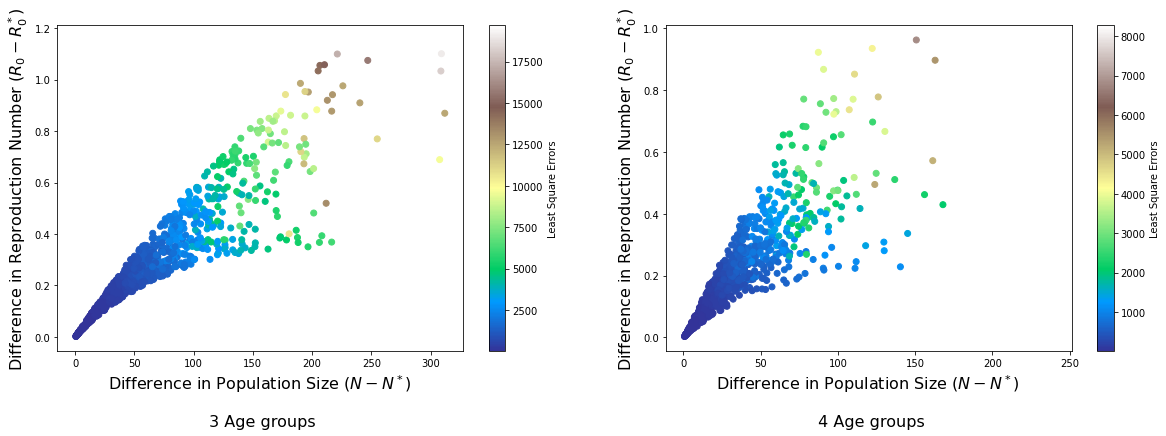

In [41]:
plt.rcParams['figure.figsize'] = (20, 6)
fig = plt.figure(constrained_layout=False, tight_layout=True)
fig, axs = plt.subplots(ncols=2)
zplot = axs[0].scatter((1000- np.array(Ne_3)), (4-np.array(transformed_R0_3)), c=loss_3, cmap='terrain')
#plt.xlabel('heterogeniety = $\sum_{i\\neq j} \\beta_{i,j} $', fontsize=14)
axs[0].set_xlabel('Difference in Population Size ($N-N^*$) \n \n 3 Age groups', fontsize=16)
axs[0].set_ylabel('Difference in Reproduction Number ($R_0 - R_0^*$)', fontsize=16)
plt.colorbar(zplot, ax=axs[0], label='Least Square Errors')
#axs[0].set_title('3 age groups', fontsize=16)
#plt.title('Difference in Reprod No. vs Difference in Pop size (when $m=4$)')
zplot1 = axs[1].scatter((1000- np.array(Ne_4)), (4-np.array(transformed_R0_4)), c=loss_4, cmap='terrain')
#plt.xlabel('heterogeniety = $\sum_{i\\neq j} \\beta_{i,j} $', fontsize=14)
axs[1].set_xlabel('Difference in Population Size ($N-N^*$) \n \n 4 Age groups', fontsize=16)
axs[1].set_ylabel('Difference in Reproduction Number ($R_0 - R_0^*$)', fontsize=16)
#axs[1].set_title('4 age groups', fontsize=16)
plt.colorbar(zplot1, ax=axs[1], label='Least Square Errors')
plt.savefig('result_point1.pdf')
plt.show()


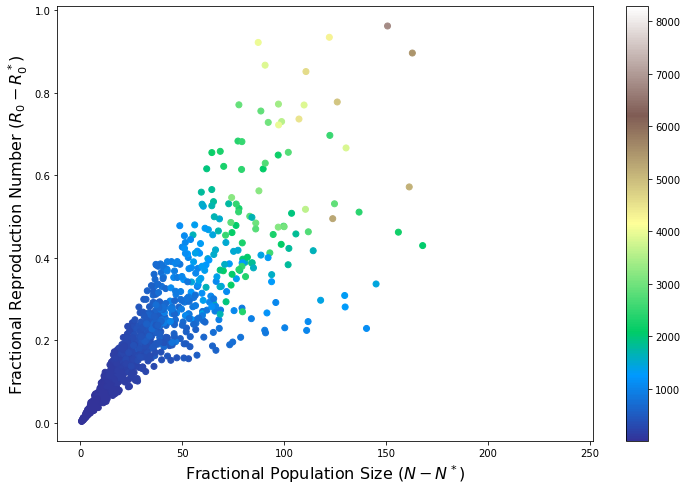

In [20]:
"""
outlier_limit_ = 2.5*np.percentile(transformed_R0_4, 25) - 1.5*np.percentile(transformed_R0_4, 75)
outliers_list_4 = np.argwhere(np.array(transformed_R0_4)< outlier_limit_).transpose()[0]
colors_ = ['red' for i in range(1000)]
for index in outliers_list_4:
    colors_[index] = 'blue'
heterogeniety_ = []
for index in range(1000):
    transmsson_matrx = poss4[index]
    heterogeniety_.append(np.sum(transmsson_matrx) - np.trace(transmsson_matrx))
"""    

plt.scatter((1000- np.array(Ne_4)), (4-np.array(transformed_R0_4)), c=loss_4, cmap='terrain')
#plt.xlabel('heterogeniety = $\sum_{i\\neq j} \\beta_{i,j} $', fontsize=14)
plt.xlabel('Difference in Population Size ($N-N^*$)', fontsize=16)
plt.ylabel('Difference in Reproduction Number ($R_0 - R_0^*$)', fontsize=16)
plt.colorbar()
#plt.title('Difference in Reprod No. vs Difference in Pop size (when $m=4$)')
plt.show()

In [26]:
trans_mat3 = np.array([[0.3, 0, 0], [0, 0.4, 0], [0, 0, 0.8]])
trans_mat4 = np.array([[0.2, 0, 0, 0], [0, 0.8, 0, 0], [0, 0, 0.5, 0], [0, 0, 0, 0.4]])
possibles = []
for seed in range(50000):
    b = sog.rvs(4, random_state=seed)
    c = np.matmul(np.matmul(np.transpose(b), trans_mat4), b)
    if(np.all(c>=np.zeros((4, 4)))):
        possibles.append(c)
len(possibles)

1300

In [29]:
gen_reprod_no(possibles[6])

4.000000000000007

# Vaccine Intervention Model

# Varied Contact Model

# Point 2

In [6]:
plt.rcParams['figure.figsize'] = (12, 8)
Ns = [100000, 50000, 25000, 200000]
beta_dur = [(0.4, 4), (0.8, 2), (0.2, 8), (0.6, 5), (0.3, 10), (0.75, 4)]
cols = []
i = 1
for comb in beta_dur:
    beta = comb[0]
    dur = comb[1]
    cols.append('(ground) case: %d' %i)
    cols.append('(transformed): %d' %i)
    i += 1
cols 


['(ground) case: 1',
 '(transformed): 1',
 '(ground) case: 2',
 '(transformed): 2',
 '(ground) case: 3',
 '(transformed): 3',
 '(ground) case: 4',
 '(transformed): 4',
 '(ground) case: 5',
 '(transformed): 5',
 '(ground) case: 6',
 '(transformed): 6']

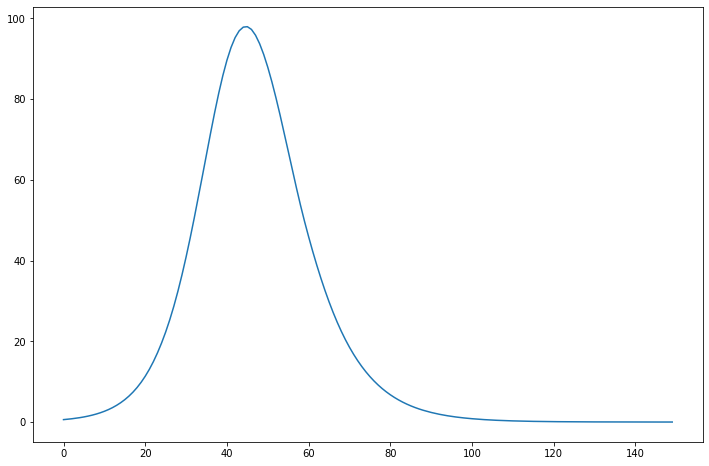

In [8]:
N = 2000
t = 150
comb = beta_dur[0]
beta = comb[0]/N
dur = comb[1]
det_SIR_sol = solve_ivp(SIR_model, (0, 2*t), y0=[1, 0, beta, N, dur], t_eval=range(t))
plt.plot(0.6*det_SIR_sol.y[0])
plt.show()


In [9]:
N = 2000
t = 150
for comb in beta_dur[:2]:
    beta = comb[0]/N
    dur = comb[1]
    det_SIR_sol = solve_ivp(SIR_model, (0, 2*t), y0=[1, 0, beta, N, dur], t_eval=range(t))
    ls_error = 1e4
    beta = comb[0]*(N**(-1))
    dur = comb[1]
    det_SIR_sol = solve_ivp(SIR_model, (0, 2*t), y0=[1, 0, beta, N, dur], t_eval=range(t))
    print(1)
    ls_error = 1e4
    while( ls_error > 1e3):
        beta_cand = np.random.uniform(0.0002, 0.001)
        Ne = np.random.randint(100, 2500)
        try:
            obj_sir = Generate_SIR_Neff_fixed_dur(0.5*det_SIR_sol.y[0], [Ne, beta_cand], dur)
            params = obj_sir.generate_parameters().x
            transformed_SIR_sol = solve_ivp(SIR_model, (0, 2*t), y0=[1, 0, params[1], params[0], dur], t_eval=range(t))
            ls_error = least_sq_error(transformed_SIR_sol.y[0], det_SIR_sol.y[0])
        except:
            ls_error = 1e4
    print(least_sq_error(transformed_SIR_sol.y[0], det_SIR_sol.y[0]))
    t_stop = 20
    while(t_stop<150 and det_SIR_sol.y[0][t_stop]>1 ):
        t_stop += 1
    if(dur==8):
        s0=5
    else:
        s0=20
    plt.scatter(range(t_stop), det_SIR_sol.y[0][0:t_stop], label='(simulated) $\\beta =$%0.5f, $dur =$%d, $R_0 =$%.2f'%(beta, dur, beta*dur*N), s=s0)
    plt.plot(transformed_SIR_sol.y[0][:t_stop], lw=2, label='(fitted) $N_e =$%d, $\\beta_e =$%0.5f, $dur=$%d'%(params[0], params[1], dur))

plt.xlabel('Days (t)')
plt.ylabel('Infected Cases $I(t)$')
#plt.title('Infectious Data Timeseries for $N=$%d' %N)
plt.legend()
#plt.savefig('Case %d.png' %j)
plt.show()

1


In [25]:
Ns = [1000, 500, 250, 2000]
beta_dur = [(0.4, 4), (0.8, 2), (0.2, 8), (0.6, 5), (0.3, 10), (0.75, 4)]
t = 150
optim_list = [0 for i in range(6)]
j = 0
for N in Ns:
    data_ = []
    fig = plt.figure()
    for comb in beta_dur:
        beta = comb[0]*(N**(-1))
        dur = comb[1]
        det_SIR_sol = solve_ivp(SIR_model, (0, 2*t), y0=[1, 0, beta, N, dur], t_eval=range(t))
        print(1)
        ls_error = 1e4
        while( ls_error > 1e3):
            beta_cand = np.random.uniform(0.0002, 0.001)
            Ne = np.random.randint(100, 2500)
            try:
                obj_sir = Generate_SIR_Neff_fixed_dur(det_SIR_sol.y[0], [Ne, beta_cand], dur)
                params = obj_sir.generate_parameters().x
                transformed_SIR_sol = solve_ivp(SIR_model, (0, 2*t), y0=[1, 0, params[1], params[0], dur], t_eval=range(t))
                ls_error = least_sq_error(transformed_SIR_sol.y[0], det_SIR_sol.y[0])
            except:
                ls_error = 1e4
        #print(least_sq_error(transformed_SIR_sol.y[0], det_SIR_sol.y[0]))
        #plt.plot(det_SIR_sol.y[0], label='(ground) $\\beta =$%0.2f, $dur =$%d, $R_0 =$%.2f'%(beta, dur, beta*dur*N))
        #plt.plot(transformed_SIR_sol.y[0], linestyle='--', lw=2,
                #label='(transformed) $N_e =$%d, $\\beta_e =$%0.2f, $dur=$%d'%(params[0], params[1], dur))
        data_.append(det_SIR_sol.y[0])
        data_.append(transformed_SIR_sol.y[0])
    data_ = np.array(data_).transpose()
    dataframe_ = pd.DataFrame(data_, columns=cols)
    dataframe_.to_csv('case %d.csv'%j)
    #plt.xlabel('Days')
    #plt.ylabel('Infected Cases $I(t)$')
    #plt.title('Infectious Data Timeseries for $N=$%d' %N)
    #plt.legend()
    #plt.savefig('Case %d.png' %j)
    j += 1        

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [6]:
Ns = [100000, 50000, 25000, 200000]
beta_dur = [(0.4, 4), (0.8, 2), (0.2, 8), (0.6, 5), (0.3, 10), (0.75, 4)]
t = 250
optim_list = [0 for i in range(6)]
data_ = []
j = 0
for N in Ns:
    fig = plt.figure()
    for comb in beta_dur:
        beta = comb[0]*(N**-1)
        dur = comb[1]
        det_SIR_sol = solve_ivp(SIR_model, (0, 2*t), y0=[1, 0, beta, N, dur], t_eval=range(t))
        #print(1)
        ls_error = 1e7
        while( ls_error > 1e6):
            beta_cand = np.random.uniform(0.2, 1)
            Ne = np.random.randint(10000, 250000)
            try:
                obj_sir = Generate_SIR_Neff_fixed_dur(det_SIR_sol.y[0], [Ne, beta_cand], dur)
                params = obj_sir.generate_parameters().x
                transformed_SIR_sol = solve_ivp(SIR_model, (0, 2*t), y0=[1, 0, params[1], params[0], dur], t_eval=range(t))
                ls_error = least_sq_error(transformed_SIR_sol.y[0], det_SIR_sol.y[0])
            except:
                ls_error = 1e7
        #print(least_sq_error(transformed_SIR_sol.y[1], det_SIR_sol.y[1]))
        plt.plot(det_SIR_sol.y[0], label='(ground) $\\beta =$%0.2f, $dur =$%d, $R_0 =$%.2f'%(beta, dur, beta*dur*N))
        plt.plot(transformed_SIR_sol.y[0], linestyle='--', lw=2,
                label='(transformed) $N_e =$%d, $\\beta_e =$%0.2f, $dur=$%d'%(params[0], params[1], dur))
        #data_.append(det_SIR_sol.y[1])
        #data_.append(transformed_SIR_sol.y[1])
    #data_ = np.array(data_).transpose()
    #dataframe_ = pd.DataFrame(data_, columns=cols)
    #dataframe_.to_csv('case %d.csv'%j)
    plt.xlabel('Days')
    plt.ylabel('Infected Cases $I(t)$')
    plt.title('Infectious Data Timeseries for $N=$%d' %N)
    plt.legend()
    plt.savefig('Case %d.png' %j)
    j += 1        

In [20]:
data1_ = np.array(data_)
j = 6
for i in range(1, 5):
    data1_ = np.array(data_[12*(i-1):12*i]).transpose()
    datafr_ = pd.DataFrame(data1_, columns=cols)
    datafr_.to_csv('case %d.csv' %j)
    j += 1

# Point3

In [42]:
conf_cases = pd.read_csv("C:\\Users\\user\\Downloads\\dataverse_files\\cityConfirmed.csv")
conf_deaths = pd.read_csv("C:\\Users\\user\\Downloads\\dataverse_files\\cityDeath.csv")
conf_recov = pd.read_csv("C:\\Users\\user\\Downloads\\dataverse_files\\cityRecover.csv")

In [20]:
conf_recov.head()

,City_EN,Gbcode,GbProv,GbCity,T_H_20200124,T_H_20200125,T_H_20200126,T_H_20200127,T_H_20200128,T_H_20200129,...,N_H_20221021,N_H_20221022,N_H_20221023,N_H_20221024,N_H_20221025,N_H_20221026,N_H_20221027,N_H_20221028,N_H_20221029,N_H_20221030
0,Beijing,110000,11,1100,1,2,2,2,4,4,...,37,30,0,0,41,14,0,0,0,0
1,Tianjin,120000,12,1200,0,0,0,0,0,0,...,33,1,0,0,10,2,0,0,0,0
2,Shijiazhuang,130100,13,1301,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Tangshan,130200,13,1302,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Qinhuangdao,130300,13,1303,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
conf_cases_Tianjin = []
conf_deaths_Tianjin = []
conf_recov_Tianjin = []
for i in range(4, 102):
    conf_cases_Tianjin.append(conf_cases.iloc[1][i])
    conf_deaths_Tianjin.append(conf_deaths.iloc[1][i])
    conf_recov_Tianjin.append(conf_recov.iloc[1][i])

infected_data_Tianjin = np.array(conf_cases_Tianjin) - np.array(conf_deaths_Tianjin) - np.array(conf_recov_Tianjin)

In [37]:
conf_cases.columns[101]

'T_C_20200430'

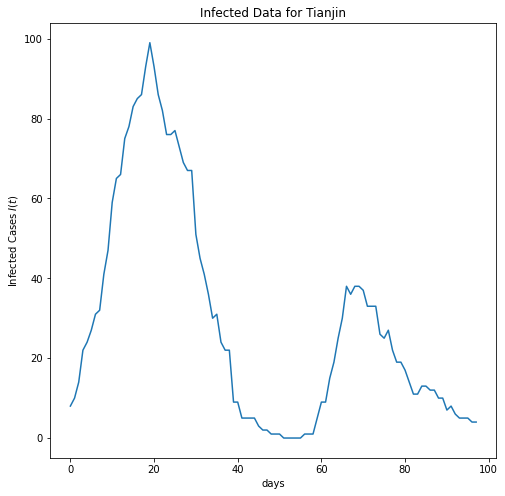

0


In [8]:
plt.plot(infected_data_Tianjin)
plt.xlabel('days')
plt.ylabel('Infected Cases $I(t)$')
plt.title('Infected Data for Tianjin')
plt.show()
print(infected_data_Tianjin[55])

In [61]:
plt.rcParams['figure.figsize'] = (12, 8)

In [44]:
N = 13860000
t = 54
beta_cand = 2*(N**(-1))
dur =  1
obj_sir = Generate_SIR(infected_data_Tianjin[:t], [beta_cand, dur], N)
params = obj_sir.generate_parameters().x
transformed_SIR_sol = solve_ivp(SIR_model, (0, 2*t), y0=[8, 0, params[0], N, params[1]], t_eval=range(t))
obj_sir_Ne = Generate_SIR_Neff_fixed_dur(infected_data_Tianjin[:t], [1000, 0.0005], 6)
params_Ne = obj_sir_Ne.generate_parameters().x
transformed_SIR_sol_Ne = solve_ivp(SIR_model, (0, 2*t), y0=[8, 0, params_Ne[1], params_Ne[0], 6], t_eval=range(t))
ls_error = least_sq_error(transformed_SIR_sol.y[0], infected_data_Tianjin[:t])
ls_error_Ne = least_sq_error(transformed_SIR_sol_Ne.y[0], infected_data_Tianjin[:t])
print(ls_error, params)
print(ls_error_Ne, params_Ne)


50102.05235431707 [4.68105743e-07 1.54760635e-01]
730.6169859684862 [4.24289226e+02 9.26696369e-04]


In [27]:
print(np.round(params[0], 9))

4.68e-07


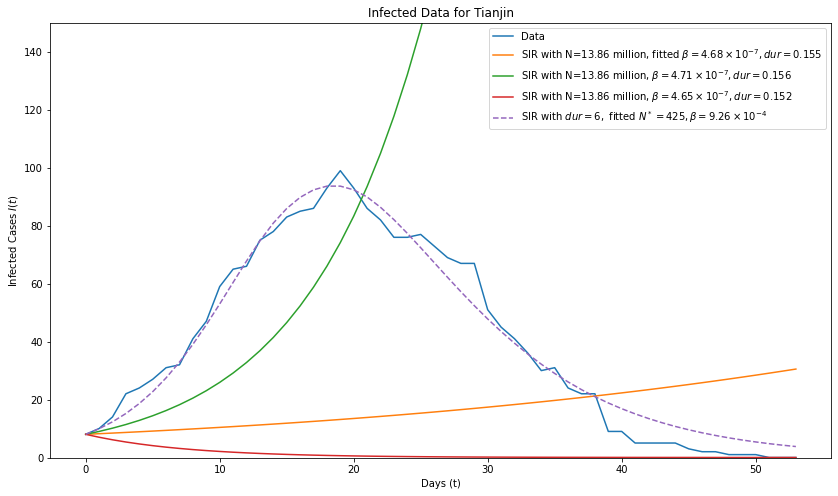

In [50]:
plt.rcParams['figure.figsize'] = (14, 8) 
transformed_SIR_sol1 = solve_ivp(SIR_model, (0, 2*t), y0=[8, 0, 4.71e-7, N, 1.56e-1], t_eval=range(t))
transformed_SIR_sol2 = solve_ivp(SIR_model, (0, 2*t), y0=[8, 0, 4.65e-7, N, 1.52e-1], t_eval=range(t))
plt.plot(infected_data_Tianjin[:t], label='Data')
plt.plot(transformed_SIR_sol.y[0], label='SIR with N=$13.86$ million, fitted $\\beta=4.68\\times 10^{-7}, dur=0.155$')
plt.plot(transformed_SIR_sol1.y[0], label='SIR with N=$13.86$ million, $\\beta=4.71\\times 10^{-7}, dur=0.156$')
plt.plot(transformed_SIR_sol2.y[0], label='SIR with N=$13.86$ million, $\\beta=4.65\\times 10^{-7}, dur=0.152$')
plt.plot(transformed_SIR_sol_Ne.y[0], linestyle='dashed', label='SIR with $dur=6,$ fitted $N^*=425, \\beta=9.26\\times 10^{-4}$')
plt.xlabel('Days (t)')
plt.ylabel('Infected Cases $I(t)$')
plt.title('Infected Data for Tianjin')
plt.ylim(top=150, bottom=-0.1)
plt.legend()
plt.show()

In [47]:
point3_data = []
point3_data.append(infected_data_Tianjin[:t])
point3_data.append(transformed_SIR_sol_Ne.y[0])
point3_data.append(transformed_SIR_sol.y[0])
point3_data.append(transformed_SIR_sol1.y[0])
point3_data.append(transformed_SIR_sol2.y[0])
cols = ['Ground Infected Data', 'Data fitted with Ne', 'Data fitted with N', 'N with beta=4.71e-7, dur=0.156', 'N with and beta=4.65e-7, dur=0.152']
combs = [(0.5, 5), (0.3, 4), (0.35, 3), (1.2, 1), (0.2, 6)]
for beta,dur in combs:
    beta = beta/N
    transformed_sol = solve_ivp(SIR_model, (0, 2*t), y0=[8, 0, beta, N, dur], t_eval=range(t))
    point3_data.append(transformed_sol.y[0])
    cols.append('N with beta=%.9f, dur=%.2f' %(np.round(beta, 9), dur))
point3_data = np.array(point3_data).transpose()
dataf_ = pd.DataFrame(point3_data, columns=cols)

In [48]:
dataf_.head()

,Ground Infected Data,Data fitted with Ne,Data fitted with N,"N with beta=4.71e-7, dur=0.156","N with and beta=4.65e-7, dur=0.152","N with beta=0.000000036, dur=5.00","N with beta=0.000000022, dur=4.00","N with beta=0.000000025, dur=3.00","N with beta=0.000000087, dur=1.00","N with beta=0.000000014, dur=6.00"
0,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
1,10.0,9.944434,8.213504,9.000045,6.996252,10.798868,8.410167,8.134449,9.771232,8.271160
2,14.0,12.316901,8.432496,10.124812,6.118310,14.577597,8.841371,8.271156,11.934561,8.551512
3,22.0,15.188841,8.657105,11.389778,5.350516,19.675892,9.294685,8.410161,14.577402,8.841371
4,24.0,18.636829,8.887462,12.812391,4.678877,26.560761,9.771232,8.551501,17.804878,9.141055


In [49]:
dataf_.to_csv('point3_.csv')